# Empirical Multivariate Statistics

This notebook accompanies Section 5.3 and demonstrates multivariate sampling, empirical means/covariances, whitening, mixtures, and heavy-tailed data.

It saves all figures into the `figs/` directory.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

os.makedirs("figs", exist_ok=True)

def plot_cov_ellipse(mu, Sigma, ax, **kwargs):
    vals, vecs = np.linalg.eigh(Sigma)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    w, h = 2 * np.sqrt(vals)

    from matplotlib.patches import Ellipse
    ell = Ellipse(xy=mu, width=w, height=h, angle=theta, fill=False, **kwargs)
    ax.add_patch(ell)


## 2D Correlated Gaussian

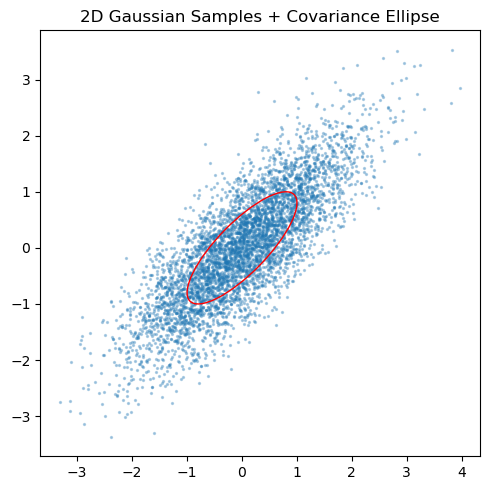

In [4]:
mu = np.array([0.,0.])
Sigma = np.array([[1.,0.8],[0.8,1.]])
N=5000
X = np.random.multivariate_normal(mu, Sigma, size=N)

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X[:,0], X[:,1], s=2, alpha=0.3)
plot_cov_ellipse(mu, Sigma, ax, color='red')
ax.set_title("2D Gaussian Samples + Covariance Ellipse")
plt.tight_layout()
plt.savefig("figs/empirical_multivariate_gaussian_scatter.png", dpi=150)
plt.show()


## Convergence of Empirical Mean and Covariance

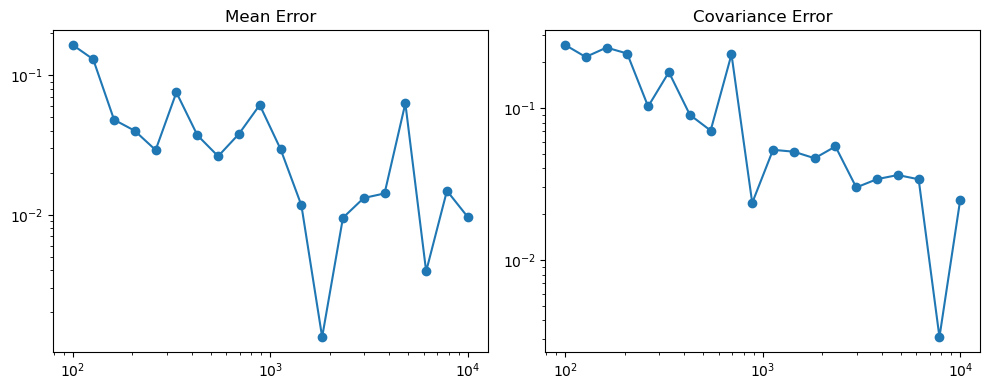

In [5]:
Ns = np.logspace(2,4,20).astype(int)
mean_errors=[]
cov_errors=[]
for n in Ns:
    Xn = np.random.multivariate_normal(mu, Sigma, size=n)
    m = Xn.mean(axis=0)
    S = np.cov(Xn,rowvar=False)
    mean_errors.append(np.linalg.norm(m-mu))
    cov_errors.append(np.linalg.norm(S-Sigma))

fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].loglog(Ns, mean_errors, marker='o')
ax[0].set_title("Mean Error")
ax[1].loglog(Ns, cov_errors, marker='o')
ax[1].set_title("Covariance Error")
plt.tight_layout()
plt.savefig("figs/empirical_multivariate_gaussian_convergence.png", dpi=150)
plt.show()


## Gaussian Mixture

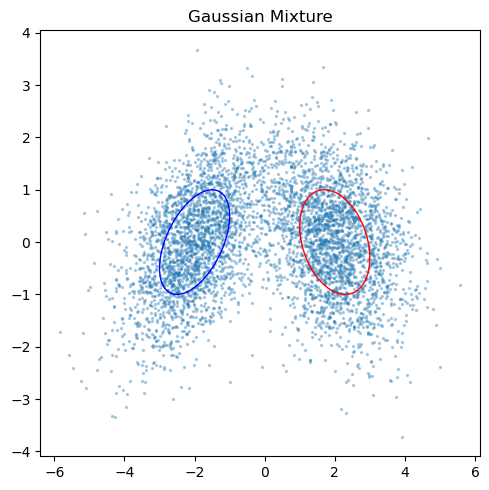

In [6]:
mu1 = np.array([-2.,0.])
mu2 = np.array([2.,0.])
S1 = np.array([[1.,0.5],[0.5,1.]])
S2 = np.array([[1.,-0.3],[-0.3,1.]])
mix = np.random.rand(N) < 0.5
Xmix = np.array([np.random.multivariate_normal(mu1,S1) if m else np.random.multivariate_normal(mu2,S2) for m in mix])

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(Xmix[:,0], Xmix[:,1], s=2, alpha=0.3)
plot_cov_ellipse(mu1,S1,ax,color='blue')
plot_cov_ellipse(mu2,S2,ax,color='red')
ax.set_title("Gaussian Mixture")
plt.tight_layout()
plt.savefig("figs/empirical_multivariate_mixture_scatter.png", dpi=150)
plt.show()


## Whitening Transform

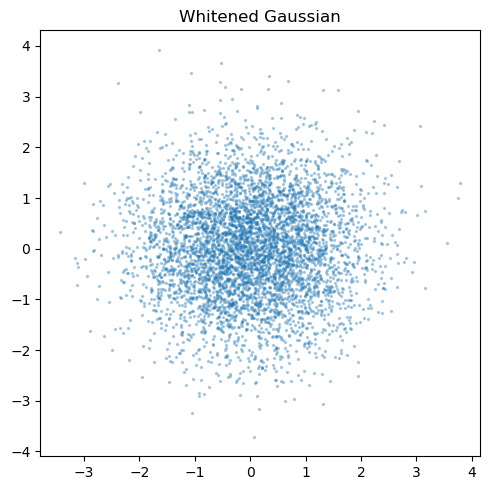

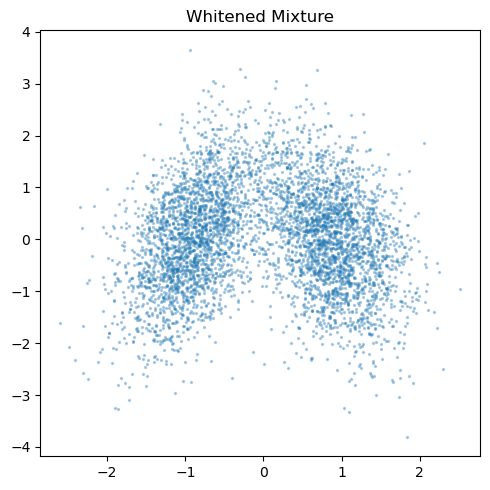

In [7]:
# Whitening original Gaussian
eigvals, eigvecs = np.linalg.eigh(Sigma)
W = eigvecs @ np.diag(1/np.sqrt(eigvals)) @ eigvecs.T
Xw = (W @ (X - mu).T).T

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(Xw[:,0], Xw[:,1], s=2, alpha=0.3)
ax.set_title("Whitened Gaussian")
plt.tight_layout()
plt.savefig("figs/empirical_multivariate_gaussian_whitened.png", dpi=150)
plt.show()

# Whitening mixture using empirical covariance
m_mix = Xmix.mean(axis=0)
S_mix = np.cov(Xmix,rowvar=False)
eigvals2, eigvecs2 = np.linalg.eigh(S_mix)
W2 = eigvecs2 @ np.diag(1/np.sqrt(eigvals2)) @ eigvecs2.T
Xmix_w = (W2 @ (Xmix - m_mix).T).T

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(Xmix_w[:,0], Xmix_w[:,1], s=2, alpha=0.3)
ax.set_title("Whitened Mixture")
plt.tight_layout()
plt.savefig("figs/empirical_multivariate_mixture_whitened.png", dpi=150)
plt.show()


## Heavy-Tailed Distribution

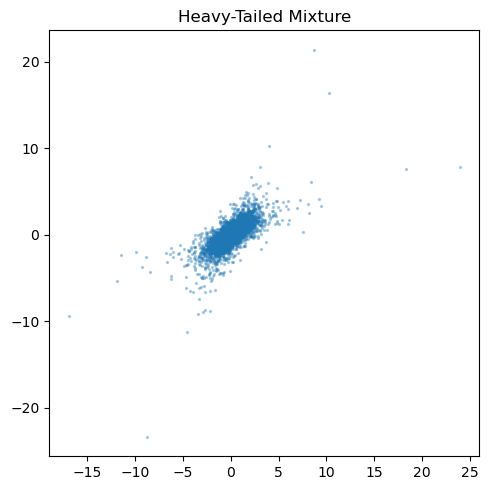

In [8]:
# Gaussian + Student-t mixture
df=3
S_t = np.array([[1.,0.],[0.,1.]])
X_t = np.random.standard_t(df, size=(N,2))
# scale to have covariance ~Sigma (rough)
X_t = X_t @ np.array([[1.,0.4],[0.4,1.]])

mask = np.random.rand(N) < 0.5
Xht = np.where(mask[:,None],X,X_t)

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(Xht[:,0], Xht[:,1], s=2, alpha=0.3)
ax.set_title("Heavy-Tailed Mixture")
plt.tight_layout()
plt.savefig("figs/empirical_multivariate_heavytail_scatter.png", dpi=150)
plt.show()
